<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Milestone_4__Model_2_Irving_fixed_oversample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

## Initial Preprocessing

In [3]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
ohe = pd.get_dummies(df[['dzgroup']])
df = df.drop(['dzgroup'], axis = 1)

X = df.copy()
y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

# scaling data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [4]:
X.head()

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,0.544507,1.0,0.0,0.00,0.333700,0.139860,0.0,0.0,0.538889,0.046591,...,0.048945,0.001590,0.060112,0.476923,0.675213,0.0,0.0,0.0,1.0,0.0
1,0.538672,1.0,1.0,0.00,0.164275,0.321678,0.0,0.0,0.433333,0.090846,...,0.153840,0.004769,0.081967,0.338462,0.699633,0.0,0.0,0.0,0.0,1.0
2,0.554409,0.0,1.0,0.26,0.398999,0.405594,0.0,0.0,0.383333,0.233711,...,0.087410,0.220986,0.153014,0.307692,0.661783,0.0,0.0,0.0,0.0,1.0
3,0.383276,0.0,0.0,0.00,0.311257,0.293706,0.0,0.0,0.372222,0.085416,...,0.055945,0.063587,0.027324,0.307692,0.599511,0.0,0.0,0.0,0.0,1.0
4,0.434763,1.0,1.0,0.00,0.132662,0.111888,0.0,0.0,0.744444,0.060566,...,0.118875,0.006359,0.038251,0.476923,0.575091,0.0,0.0,0.0,0.0,1.0


In [5]:
y.head()

,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig
0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0


In [6]:
X.shape

(3840, 24)

# Model 2
## Building the Base Model

In [7]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [8]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [10]:
def buildmodel():
    model = Sequential([
        Dense(units = 72, activation = 'tanh', input_dim = 24),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer ='SGD', loss='categorical_crossentropy')
    return(model)

In [11]:
classifier = buildmodel()
history = classifier.fit(X_train.astype(float), y_train, batch_size = 20, validation_split=0.1, epochs = 100, verbose = 0)
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

KeyboardInterrupt: 

In [ ]:
y_label = y_test.to_numpy()
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       344
           1       0.41      0.36      0.38       103
           2       0.32      0.43      0.37        84
           3       0.44      0.10      0.16        41
           4       0.00      0.00      0.00        16
           5       0.69      0.55      0.62        65
           6       0.32      0.52      0.39        46
           7       0.42      0.16      0.23        69

    accuracy                           0.52       768
   macro avg       0.40      0.36      0.35       768
weighted avg       0.51      0.52      0.50       768



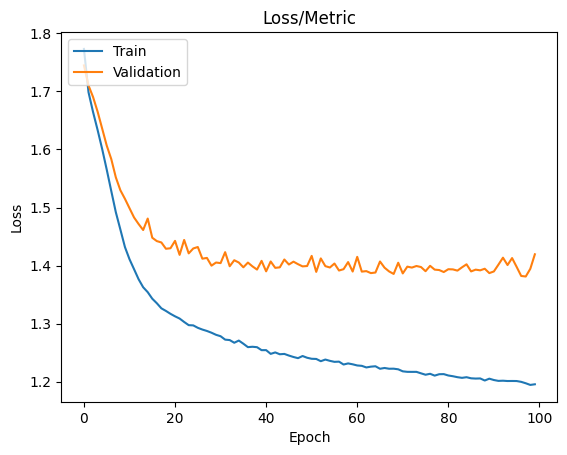

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## K-Fold Cross-Validation

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score, cross_validate
import keras
import keras_tuner
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
def buildmodel():
    model = Sequential([
      Dense(units = 72, activation = 'tanh', input_dim = 24),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['mse','accuracy'])
    return(model)

#epochs are the number of iterative training steps we do on the entire dataset, and each iteration is a step. batch_size is the number of datapoints we select per batch. total obs = batch_size * batches
estimator = KerasClassifier(model=buildmodel, epochs=50, batch_size=20, verbose=0) # before submitting please set verbose = 0, and rerun. If not grading will be no bueno!
kfold = RepeatedKFold(n_splits = 10, n_repeats = 5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1,scoring = 'accuracy')

In [ ]:
avg_acc = results.mean()
avg_acc

0.5262466686408055

## Hyperparameter Tuning

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
#build the hyperparameter tuning model with tuning the units, activation function, and learning rates
def build_model(hp):
    model = keras.Sequential()
    activation = hp.Choice("activation", ['relu', 'sigmoid', 'tanh', 'softmax', 'linear', 'leaky_relu', 'mish'])
    # input layer
    model.add(
        layers.Dense(units = hp.Int("units", min_value = 18, max_value = 180, step = 20),
              activation = activation,
              input_dim = X.shape[1]
        )
    )
    # hidden layers
    for i in range(3):
      model.add(
          layers.Dense(
              units = hp.Int("units", min_value = 12, max_value = 180, step = 20),
              activation = activation,
          )
      )
    # output layer
    model.add(
          layers.Dense(
              units = 8,
              activation = 'softmax'
          )
      )
    loss = hp.Choice("loss", values = ["categorical_crossentropy", "mse", "binary_crossentropy"])
    learning_rate = hp.Float("lr", min_value = 0.001, max_value = 0.1, step = 0.01)
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ["accuracy"],
    )
    return model


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)
tuner.search(X_train, y_train, epochs=50, validation_split = 0.2, callbacks = [early_stopping], verbose = 0)

In [ ]:
tuner.results_summary(num_trials=1)

Results summary
Results in my_dir/hypertune
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
activation: linear
units: 98
loss: categorical_crossentropy
lr: 0.061
optimizer: sgd
Score: 0.560490071773529


18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       247
           1       0.55      0.33      0.41        85
           2       0.29      0.54      0.37        59
           3       0.50      0.02      0.04        45
           4       0.00      0.00      0.00        19
           5       0.70      0.47      0.57        40
           6       0.38      0.22      0.28        36
           7       0.56      0.20      0.30        45

    accuracy                           0.52       576
   macro avg       0.45      0.33      0.33       576
weighted avg       0.52      0.52      0.47       576



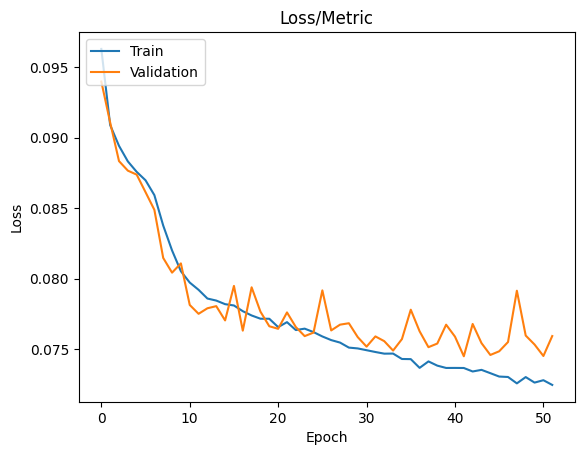

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train.astype(float), y_train, epochs=100, verbose = 0, callbacks = [early_stopping], validation_split = 0.2)

y_label = y_test.to_numpy()
yhat_test = model.predict(X_test.astype(float))
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)

print(classification_report(actual,pred))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Hyperparameter Tuning with Oversampling

In [70]:
from sklearn.preprocessing import LabelEncoder
myle=LabelEncoder()
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]
# label encoding race
df['race'] = myle.fit_transform(df['race'])
# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
print(df['dzgroup'].value_counts())
y = df['dzgroup']
X = df.drop(columns = 'dzgroup')

# scaling data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

ARF/MOSF w/Sepsis    1725
CHF                   473
COPD                  447
MOSF w/Malig          338
Coma                  265
Cirrhosis             248
Lung Cancer           246
Colon Cancer           98
Name: dzgroup, dtype: int64


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [72]:
smote = SMOTE(random_state = 21)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [73]:
ohe = OneHotEncoder()
y_train_encoded = ohe.fit_transform(pd.DataFrame(y_train_resample)).todense()
ohe = OneHotEncoder()
y_test_encoded = ohe.fit_transform(pd.DataFrame(y_test)).todense()

In [75]:
X_train_resample, X_val, y_train_resample, y_val = train_test_split(X_train_resample, y_train_encoded, random_state = 21, test_size = 0.1)

In [67]:
def buildmodel():
    model = Sequential([
        Dense(units = 72, activation = 'tanh', input_dim = 20),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer ='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])
    return(model)

In [77]:
classifier = buildmodel()
history = classifier.fit(X_train_resample,y_train_resample, batch_size = 20, epochs = 100, verbose = 1, validation_data=(X_val, y_val))
yhat_test = classifier.predict(X_test)

Epoch 1/100
502/502 [==============================] - 6s 9ms/step - loss: 1.9546 - accuracy: 0.2763 - val_loss: 1.8096 - val_accuracy: 0.3851
Epoch 2/100
502/502 [==============================] - 2s 4ms/step - loss: 1.6557 - accuracy: 0.3938 - val_loss: 1.5285 - val_accuracy: 0.4434
Epoch 3/100
502/502 [==============================] - 2s 4ms/step - loss: 1.4967 - accuracy: 0.4337 - val_loss: 1.4586 - val_accuracy: 0.4668
Epoch 4/100
502/502 [==============================] - 2s 4ms/step - loss: 1.4418 - accuracy: 0.4541 - val_loss: 1.4566 - val_accuracy: 0.4363
Epoch 5/100
502/502 [==============================] - 2s 4ms/step - loss: 1.4130 - accuracy: 0.4677 - val_loss: 1.3776 - val_accuracy: 0.4982
Epoch 6/100
502/502 [==============================] - 2s 5ms/step - loss: 1.3951 - accuracy: 0.4763 - val_loss: 1.3774 - val_accuracy: 0.4928
Epoch 7/100
502/502 [==============================] - 1s 2ms/step - loss: 1.3826 - accuracy: 0.4822 - val_loss: 1.4480 - val_accuracy: 0.4542

In [91]:
actual_pred = []
for i in yhat_test:
  index = np.argmax(i)
  actual_pred.append(index)

In [93]:
ground_truth = []
for i in y_test_encoded:
  index = np.argmax(i)
  ground_truth.append(index)

In [95]:
print(classification_report(ground_truth,actual_pred))

              precision    recall  f1-score   support

           0       0.69      0.33      0.45       333
           1       0.42      0.40      0.41        96
           2       0.33      0.36      0.35        83
           3       0.23      0.49      0.31        49
           4       0.08      0.17      0.11        18
           5       0.50      0.70      0.59        77
           6       0.29      0.31      0.30        42
           7       0.27      0.51      0.35        70

    accuracy                           0.40       768
   macro avg       0.35      0.41      0.36       768
weighted avg       0.49      0.40      0.41       768



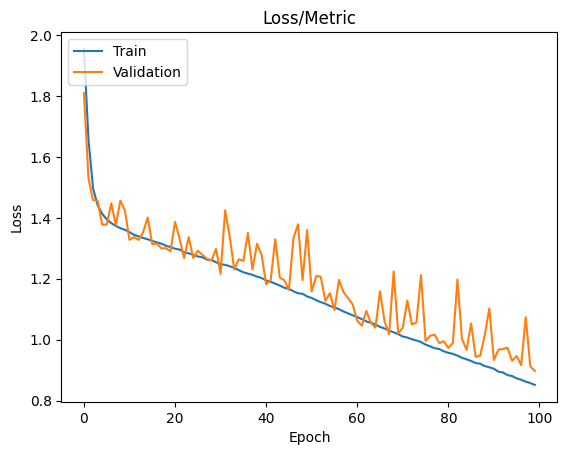

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [84]:
classifier.evaluate(X_test,y_test_encoded)

24/24 [==============================] - 0s 2ms/step - loss: 1.7171 - accuracy: 0.4010


[1.7170758247375488, 0.4010416567325592]

In [81]:
y_test_encoded

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [82]:
yhat_test

array([[7.5092852e-02, 9.0125259e-03, 2.0005750e-03, ..., 8.8894600e-01,
        1.0910431e-03, 1.5720529e-02],
       [1.7016068e-01, 1.1384841e-01, 3.3576909e-01, ..., 1.2287498e-02,
        9.5783078e-05, 2.9207790e-02],
       [5.7074394e-02, 2.9835829e-01, 4.2487609e-01, ..., 1.7121974e-03,
        8.6366571e-04, 1.0405717e-03],
       ...,
       [1.2945541e-02, 3.5503706e-01, 1.4831393e-02, ..., 3.2540812e-04,
        1.5556733e-01, 1.7069003e-02],
       [7.8322172e-02, 2.6032773e-01, 6.5213698e-01, ..., 1.5027499e-03,
        1.6684319e-03, 2.1636626e-03],
       [2.0216681e-01, 6.3357747e-01, 1.9275438e-02, ..., 3.9583696e-03,
        6.3433470e-03, 1.6902497e-02]], dtype=float32)

In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=21)
X_res, y_res = ros.fit_resample(X_train, y_train)
'''

In [ ]:
'''
ohe = OneHotEncoder()
myohedzgroup = ohe.fit_transform(y_res.values.reshape(-1,1)).toarray()
y_train_ohe = pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
myohedzgroup = ohe.fit_transform(y_test.values.reshape(-1,1)).toarray()
y_test_ohe = pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
'''

In [ ]:
ohe = OneHotEncoder()
myohedzgroup = ohe.fit_transform(y.values.reshape(-1,1)).toarray()
y_ohe = pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size = 0.15, random_state = 1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.idxmax(axis=1))
ros = RandomOverSampler(random_state=42)
#ros = SMOTE(random_state=21)
X_res, y_res = ros.fit_resample(X_train, y_train)
y_res = pd.get_dummies(y_res)
print(y_res.value_counts())

0  1  2  3  4  5  6  7
0  0  0  0  0  0  0  1    1478
                  1  0    1478
               1  0  0    1478
            1  0  0  0    1478
         1  0  0  0  0    1478
      1  0  0  0  0  0    1478
   1  0  0  0  0  0  0    1478
1  0  0  0  0  0  0  0    1478
dtype: int64


In [ ]:
tuner2 = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)
tuner2.search(X_res, y_res, epochs=50, validation_split= 0.2, callbacks = [early_stopping], verbose=0)

In [60]:
best_hps = tuner2.get_best_hyperparameters(num_trials=1)[0]
model = tuner2.hypermodel.build(best_hps)

history = model.fit(X_res.astype(float), y_res, epochs=100, batch_size = 10, verbose = 0, callbacks = [early_stopping], validation_split = 0.1)

y_label = y_test.to_numpy()
yhat_test = model.predict(X_test.astype(float))
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)

print(classification_report(actual,pred))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'tuner2' is not defined